<a href="https://colab.research.google.com/github/mohripan/Belajar-NLP/blob/main/NLP_and_Sequence_Model_Part_4_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://nlp.stanford.edu/data/glove.42B.300d.zip

--2023-06-11 16:56:25--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2023-06-11 16:56:25--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Saving to: ‘glove.42B.300d.zip’

glove.42B.300d.zip  100%[===================>]   1.75G  5.00MB/s    in 5m 52s  

2023-06-11 17:02:18 (5.08 MB/s) - ‘glove.42B.300d.zip’ saved [1877800501/1877800501]



In [2]:
!mkdir glove

In [3]:
!unzip -q /content/glove.42B.300d.zip -d glove

In [4]:
from gensim.models import Word2Vec

In [5]:
corpus = [
    'text of the first document',
    'text of the second text document',
    'number three',
    'document number four',
]

corpus = [doc.split() for doc in corpus]

model = Word2Vec(corpus, vector_size = 10, window = 2, min_count = 1, sg = 1)

print(model.wv['text'])

[ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]


In [6]:
import numpy as np

In [7]:
def load_glove_embeddings(path):
  embeddings = {}
  with open(path, 'r', encoding = 'utf-8') as file:
    for line in file:
      values = line.strip().split()
      word = values[0]
      vector = np.array(values[1:], dtype = 'float32')
      embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove_embeddings('/content/glove/glove.42B.300d.txt')

print(glove_embeddings['text'])

[ 1.5670e-01 -2.2406e-01  1.8370e-01  6.4616e-01  2.8366e-01  5.7250e-01
 -2.9115e+00  7.4529e-01  2.3426e-03  1.4693e-02 -1.1565e-01  1.7561e-01
  3.5424e-01 -2.1065e-02 -2.9127e-01 -1.9452e-01  3.1869e-01  6.2684e-01
  4.0918e-02  9.2003e-02 -1.9427e-01 -4.9586e-01  1.4694e-01 -2.7903e-01
 -7.5842e-02 -8.2243e-01  6.2999e-01 -3.9374e-02 -1.8939e-01 -4.3787e-01
  3.7667e-01  9.6839e-03  3.3840e-01  2.2171e-01 -2.6935e-01  5.0523e-02
  1.1554e-01 -5.1907e-02  4.2702e-01  3.7942e-01 -1.3508e-01  3.7566e-01
 -4.2238e-01 -2.4842e-01  4.2722e-01 -3.1349e-01  1.0448e-01 -8.6473e-02
 -7.2372e-03 -5.7965e-01 -7.2468e-02  2.8465e-01 -3.5662e-01 -1.2014e-01
  1.7577e-01  3.7206e-01 -1.6491e-01  3.1192e-01 -6.0786e-01 -1.1540e+00
  4.9371e-01 -9.9394e-02  5.0650e-01  1.2165e-01  4.8474e-02  4.3641e-01
 -7.1655e-01 -2.3858e-01 -1.6920e-01 -2.0122e-02  3.3982e-01 -2.1287e-01
 -2.1000e-02 -4.8859e-01  1.1695e-01 -1.4504e-01 -2.5419e-01 -4.2225e-02
  1.2277e-01 -4.4175e-01 -1.1966e+00 -7.9468e-01  3

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

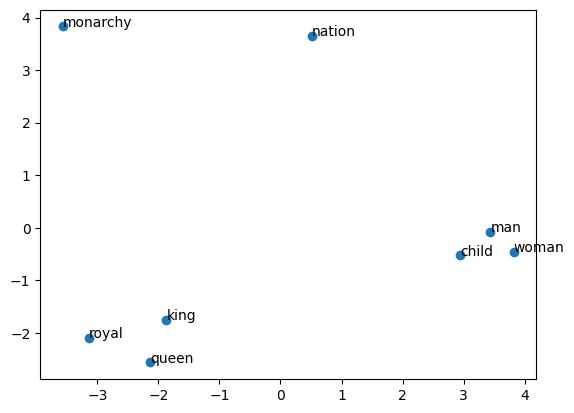

In [12]:
def plot_embeddings(embeddings, words):
  word_vectors = np.array([embeddings[w] for w in words])

  pca = PCA(n_components = 2)
  principal_components = pca.fit_transform(word_vectors)

  plt.scatter(principal_components[:, 0], principal_components[:, 1])

  for i, word in enumerate(words):
    plt.annotate(word, xy = (principal_components[i, 0], principal_components[i, 1]))
  plt.show()

words = ['king', 'queen', 'man', 'woman', 'child', 'royal', 'nation', 'monarchy']
plot_embeddings(glove_embeddings, words)

In [16]:
!pip install gdown
!gdown https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:20<00:00, 81.6MB/s]


In [13]:
from gensim.models import KeyedVectors

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

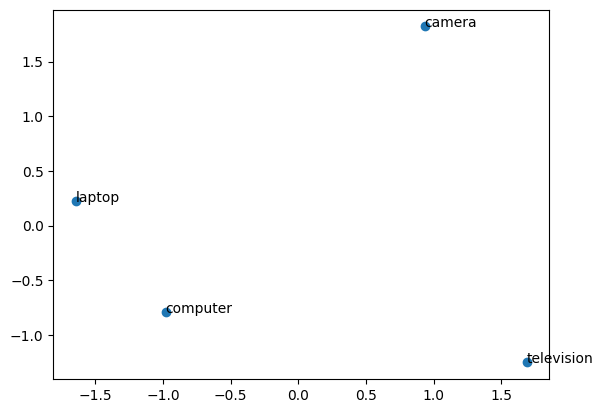

In [19]:
model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz', binary = True)

print(model['computer'])

print(model.most_similar(positive = ['woman', 'king'], negative = ['man']))

print(model.similarity('woman', 'man'))

plot_embeddings(model, ['computer', 'laptop', 'camera', 'television'])